# Converting text data to CSV

I am using the "diabetes_scale" data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html for this project which is the scaled data and also prepared for binary classification.

In [1]:
import csv

# Define file paths
input_file = 'diabetes_scale.txt'
output_file = 'diabetes_scale.csv'

# Read the .txt file and process it line by line
with open(input_file, 'r') as txtfile, open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    for line in txtfile:
        # Split each line into label and features
        parts = line.strip().split()
        label = parts[0]  # first part is the label (+1 or -1)
        features = [part.split(":")[1] for part in parts[1:]]  # split by ":" to get the feature values

        # Write the label and features to the csv file
        writer.writerow([label] + features)

print(f"Data has been converted and saved to {output_file}")

Data has been converted and saved to diabetes_scale.csv


# Creating some visuals of the data

Understanding how the data is distributed is crucial. How the data is distributed can have a significant impact on the machine learning process.

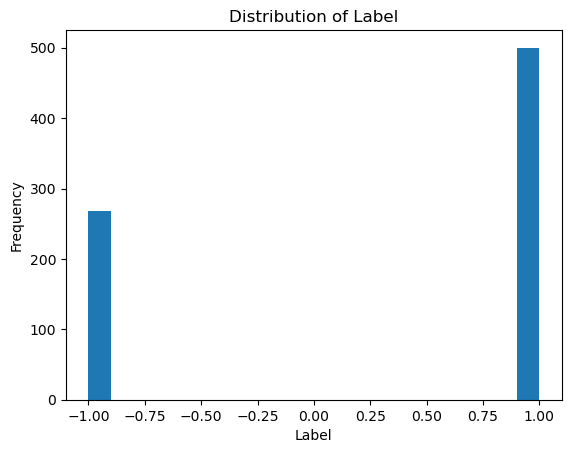

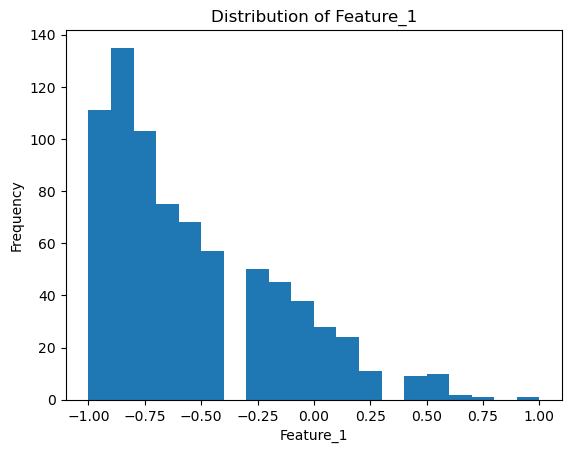

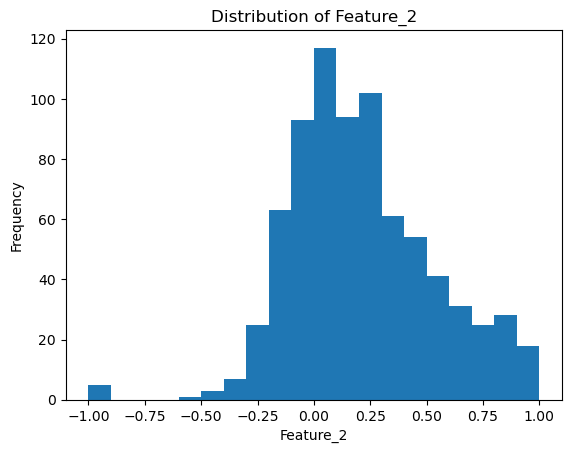

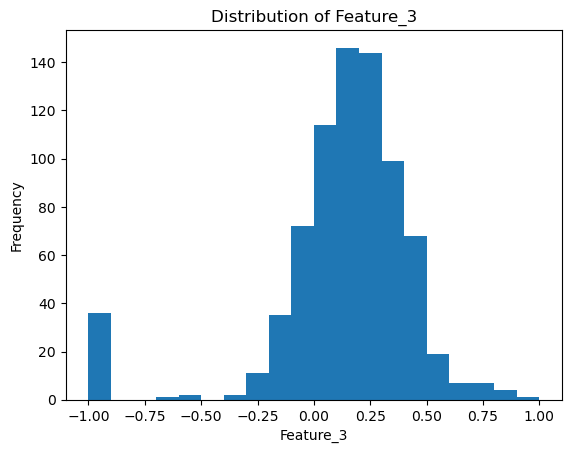

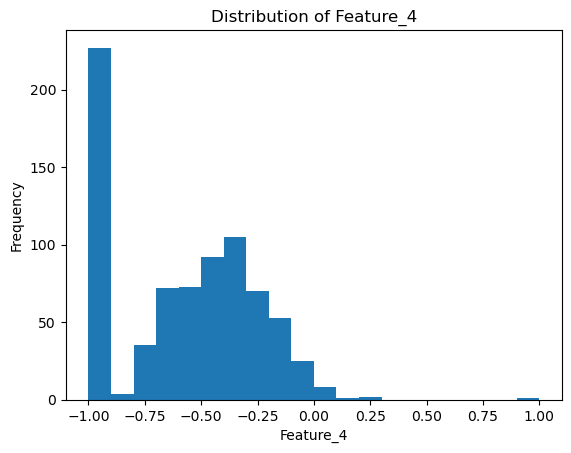

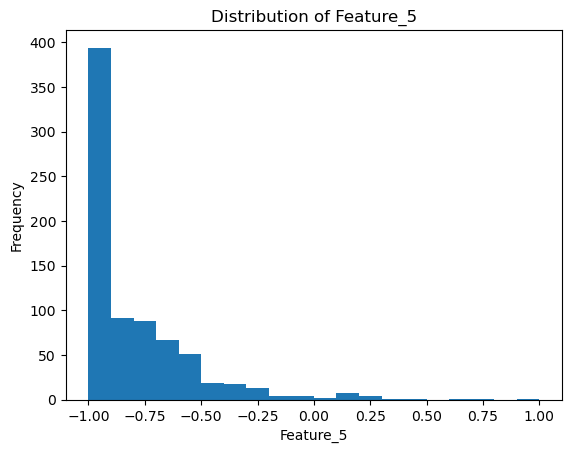

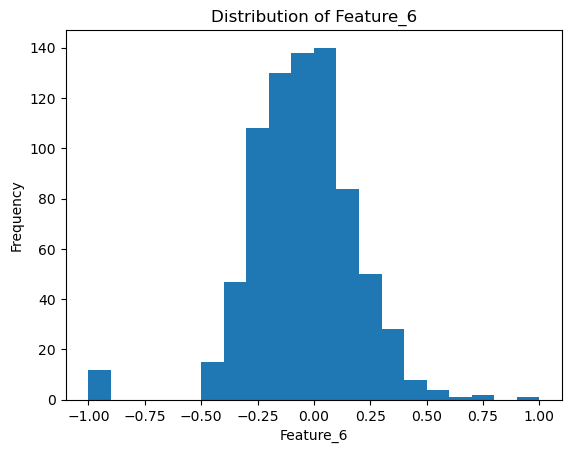

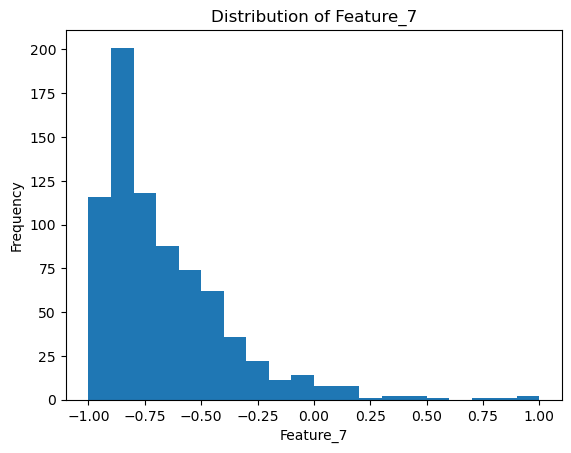

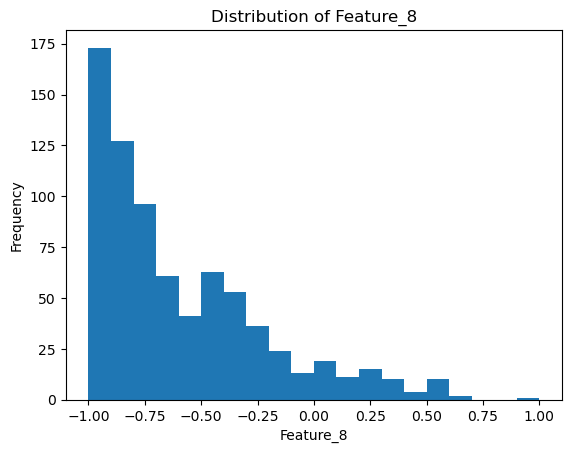

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'diabetes_scale.csv'
data = pd.read_csv(file_path, header=None)

# Assign column names assuming the first column is the label (target)
columns = ['Label'] + [f'Feature_{i}' for i in range(1, data.shape[1])]
data.columns = columns

# Plot histograms for each feature
for column in data.columns:
    plt.figure()
    data[column].hist(bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Looking for Missing Values and Imputing them

In [3]:
# Finding the missing values
missing_data_rows = data[data.isna().any(axis=1)]
missing_data_rows

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
14,-1,-0.411765,0.668342,0.180328,-0.616162,-0.586288,-0.230999,-0.565329,NaN
24,-1,0.294118,0.437186,0.540984,-0.333333,-0.654846,0.090909,-0.849701,NaN
236,-1,-0.176471,0.819095,0.377049,-0.575758,-0.546099,0.070045,-0.566183,NaN
259,-1,0.294118,0.557789,0.245902,-0.434343,-0.645390,-0.007452,0.088813,NaN
285,1,-0.176471,0.366834,0.213115,-0.474747,-0.680851,-0.225037,-0.514091,NaN
401,1,-0.294118,0.376884,-1.000000,-1.000000,-0.278688,-0.937660,0.133333,NaN
458,-1,0.176471,0.487437,0.377049,-0.030303,-0.439716,0.120715,-0.211785,NaN
517,1,-0.176471,0.256281,0.409836,-1.000000,-1.000000,0.120715,-0.807003,NaN
658,1,0.294118,0.276382,0.737705,-1.000000,-1.000000,0.162444,-0.904355,NaN


In [5]:
# Impute missing values in 'Feature_8' with the median
median_value = data['Feature_8'].median()
data.fillna({'Feature_8': median_value}, inplace=True)

# Implementing a base perceptron model and looking at some metrics

Accuracy: 64.29%


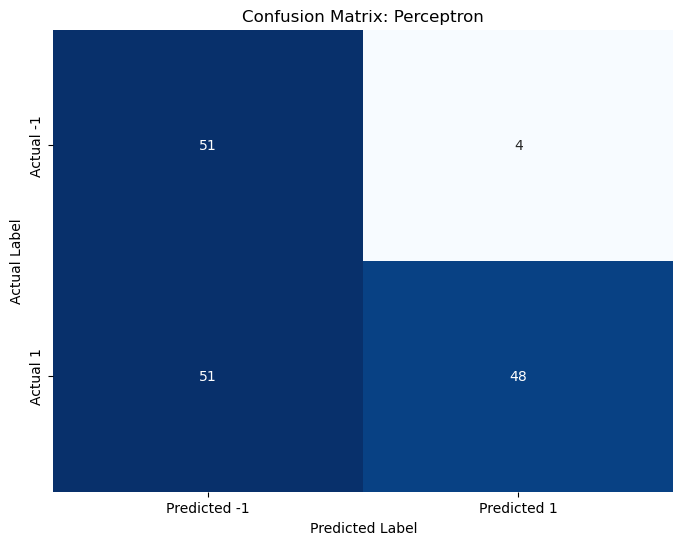

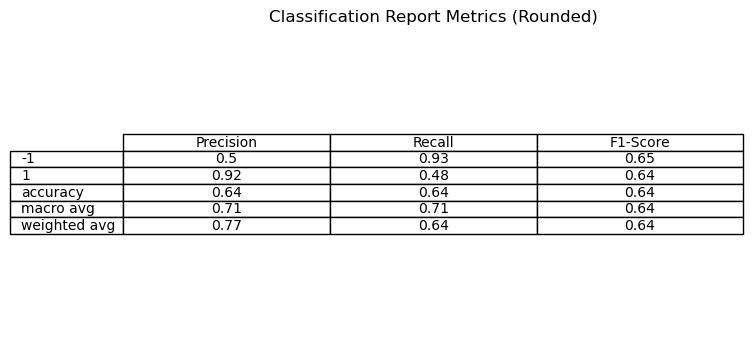

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Assuming the dataset is loaded as `data`
columns = ['Label'] + [f'Feature_{i}' for i in range(1, data.shape[1])]
data.columns = columns

# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Perceptron model (without scaling as data is already scaled)
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted -1', 'Predicted 1'], 
            yticklabels=['Actual -1', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Perceptron')
plt.show()

# Convert classification report to DataFrame for display and remove "support" column
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df = class_report_df.drop(columns='support')  # Remove "support" column

# Round the precision, recall, and f1-score to 2 decimal places
class_report_df = class_report_df.round(2)

# Plot table for precision, recall, and f1-score (without "support")
plt.figure(figsize=(8, 4))
plt.table(cellText=class_report_df[['precision', 'recall', 'f1-score']].values, 
          colLabels=['Precision', 'Recall', 'F1-Score'],
          rowLabels=class_report_df.index, cellLoc='center', loc='center')
plt.axis('off')  # Hide the axis
plt.title('Classification Report Metrics (Rounded)')
plt.show()

# Hyperparameter tuning of the perceptron

In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters:", grid_search.best_params_)
best_perceptron = grid_search.best_estimator_

# Evaluate with test set
y_pred = best_perceptron.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Best parameters: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
Accuracy: 64.29%


# Using Regularisation

Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'l1_ratio': 0.15, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}
Accuracy: 77.27%


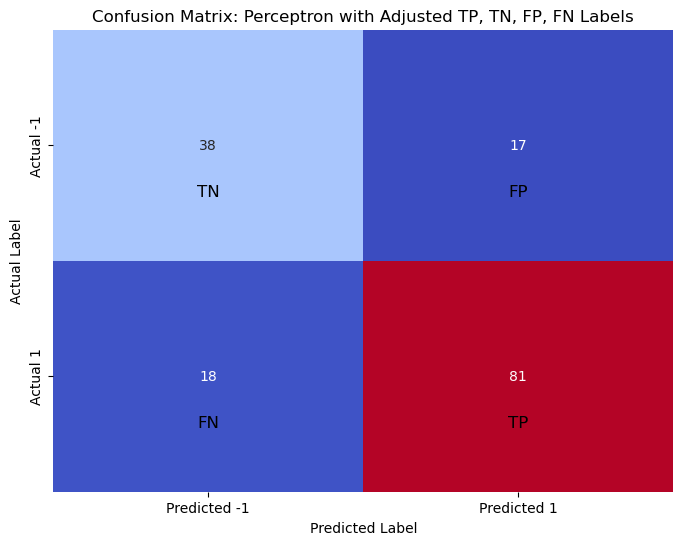

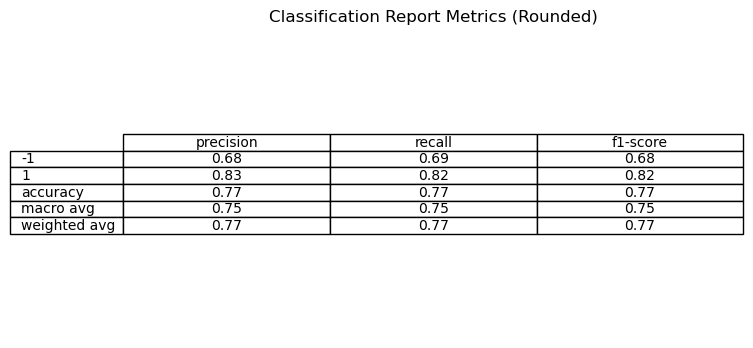

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid including penalty (L1, L2, ElasticNet)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Add L1, L2, ElasticNet
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'tol': [1e-4, 1e-3, 1e-2],
    'l1_ratio': [0.15, 0.5, 0.85]  # Only relevant when using 'elasticnet'
}

# Perform GridSearchCV
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters:", grid_search.best_params_)
best_perceptron = grid_search.best_estimator_

# Evaluate with test set
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report to get precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Round the metrics to 2 decimal places
class_report_df[['precision', 'recall', 'f1-score']] = class_report_df[['precision', 'recall', 'f1-score']].round(2)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create labels for the confusion matrix (TP, TN, FP, FN)
labels = [['TN', 'FP'], ['FN', 'TP']]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted -1', 'Predicted 1'], 
            yticklabels=['Actual -1', 'Actual 1'])

# Add TP, TN, FP, FN labels with an offset to prevent overlap
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, f'{labels[i][j]}', 
                 ha='center', va='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Perceptron with Adjusted TP, TN, FP, FN Labels')
plt.show()

# Plot table for precision, recall, F1-score, and accuracy
plt.figure(figsize=(8, 4))
plt.table(cellText=class_report_df[['precision', 'recall', 'f1-score']].values, 
          colLabels=class_report_df[['precision', 'recall', 'f1-score']].columns,
          rowLabels=class_report_df.index, cellLoc='center', loc='center')
plt.axis('off')  # Hide axis
plt.title('Classification Report Metrics (Rounded)')
plt.show()

# Using Stratified K-fold

Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'l1_ratio': 0.15, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}
Accuracy: 77.27%


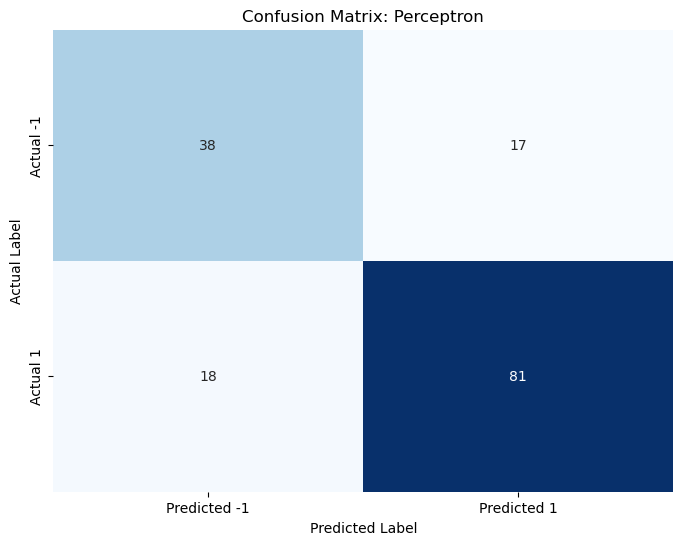

C:\Users\akifk\AppData\Local\Temp\ipykernel_22604\3248319418.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  class_report_df.loc['accuracy'] = [accuracy, '', '']  # Adding accuracy to the DataFrame
C:\Users\akifk\AppData\Local\Temp\ipykernel_22604\3248319418.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  class_report_df.loc['accuracy'] = [accuracy, '', '']  # Adding accuracy to the DataFrame


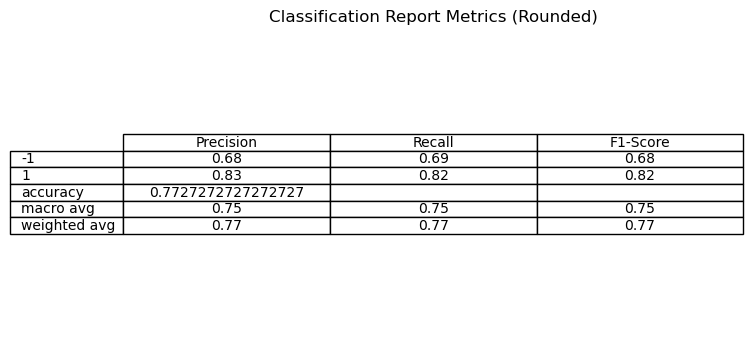

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your data is loaded as 'data'
# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid including penalty (L1, L2, ElasticNet)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Add L1, L2, ElasticNet
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'tol': [1e-4, 1e-3, 1e-2],
    'l1_ratio': [0.15, 0.5, 0.85]  # Only relevant when using 'elasticnet'
}

# Define Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Perform GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters:", grid_search.best_params_)
best_perceptron = grid_search.best_estimator_

# Evaluate with the test set
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted -1', 'Predicted 1'], 
            yticklabels=['Actual -1', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Perceptron')
plt.show()

# Convert classification report to DataFrame for display
class_report_df = pd.DataFrame(class_report).transpose()

# Remove support column and round values
class_report_df = class_report_df.drop(columns='support').round(2)

# Add accuracy to the DataFrame
class_report_df.loc['accuracy'] = [accuracy, '', '']  # Adding accuracy to the DataFrame

# Plot table for precision, recall, f1-score, and accuracy
plt.figure(figsize=(8, 4))
plt.table(cellText=class_report_df[['precision', 'recall', 'f1-score']].values, 
          colLabels=['Precision', 'Recall', 'F1-Score'],
          rowLabels=class_report_df.index, cellLoc='center', loc='center')
plt.axis('off')  # Hide the axis
plt.title('Classification Report Metrics (Rounded)')
plt.show()

# Trying Feature engineering for better results

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the Perceptron on polynomial features
perceptron_poly = Perceptron(random_state=42, alpha=0.0001, eta0=0.1, max_iter=1000, tol=0.001)
perceptron_poly.fit(X_train_poly, y_train)

# Evaluate with polynomial features
y_pred_poly = perceptron_poly.predict(X_test_poly)
print(f'Accuracy with polynomial features: {accuracy_score(y_test, y_pred_poly) * 100:.2f}%')

Accuracy with polynomial features: 72.73%


# Further Hyperparameter tuning on perceptron

Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'l1_ratio': 0.15, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}
Accuracy: 77.27%


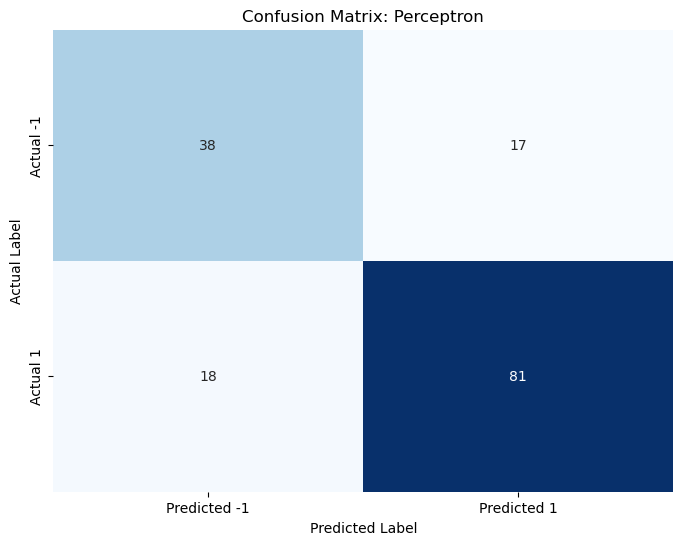

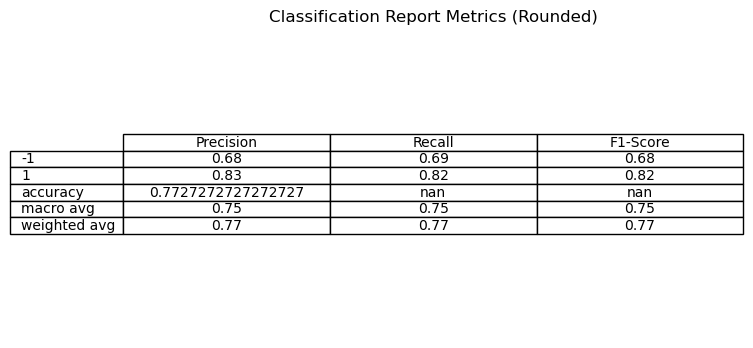

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your data is loaded as 'data'
# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid including penalty (L1, L2, ElasticNet)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Add L1, L2, ElasticNet
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'tol': [1e-4, 1e-3, 1e-2],
    'l1_ratio': [0.15, 0.5, 0.85]  # Only relevant when using 'elasticnet'
}

# Define Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Perform GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters:", grid_search.best_params_)
best_perceptron = grid_search.best_estimator_

# Evaluate with the test set
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted -1', 'Predicted 1'], 
            yticklabels=['Actual -1', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Perceptron')
plt.show()

# Convert classification report to DataFrame for display
class_report_df = pd.DataFrame(class_report).transpose()

# Remove support column and round values
class_report_df = class_report_df.drop(columns='support').round(2)

# Add accuracy to the DataFrame with None for non-numeric cells
class_report_df.loc['accuracy'] = [accuracy, None, None]  # Replacing empty strings with None

# Plot table for precision, recall, f1-score, and accuracy
plt.figure(figsize=(8, 4))
plt.table(cellText=class_report_df[['precision', 'recall', 'f1-score']].values, 
          colLabels=['Precision', 'Recall', 'F1-Score'],
          rowLabels=class_report_df.index, cellLoc='center', loc='center')
plt.axis('off')  # Hide the axis
plt.title('Classification Report Metrics (Rounded)')
plt.show()

# Class Imbalance Handling:

Accuracy: 50.65%

Classification Report:
              precision    recall  f1-score   support

          -1       0.28      0.24      0.25        55
           1       0.61      0.66      0.63        99

    accuracy                           0.51       154
   macro avg       0.44      0.45      0.44       154
weighted avg       0.49      0.51      0.50       154



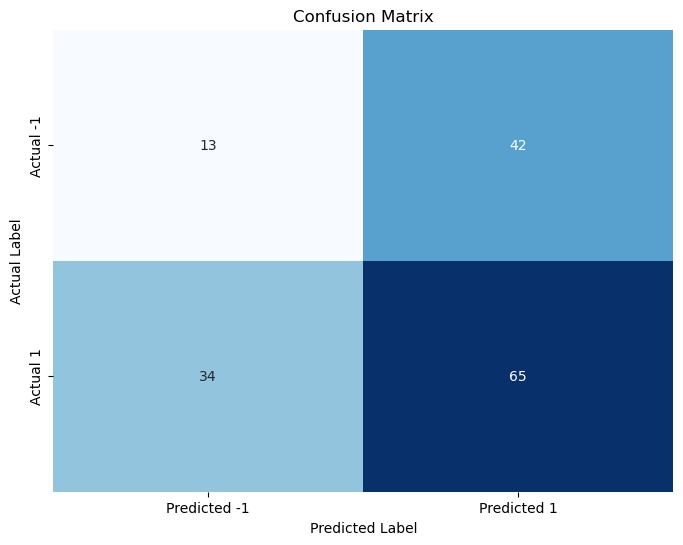

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Perceptron with class_weight set to 'balanced'
perceptron_balanced = Perceptron(class_weight='balanced', random_state=42, alpha=0.001, eta0=0.001, max_iter=1000, tol=0.0001, penalty='elasticnet')
perceptron_balanced.fit(X_train, y_train)

# Make predictions
y_pred_balanced = perceptron_balanced.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_balanced)
cm = confusion_matrix(y_test, y_pred_balanced)

# Print accuracy and classification report
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted -1', 'Predicted 1'], 
            yticklabels=['Actual -1', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Class Handling, Feature Engineering and Regularisation

Accuracy: 72.73%

Classification Report:
              precision    recall  f1-score   support

          -1       0.60      0.73      0.66        55
           1       0.83      0.73      0.77        99

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



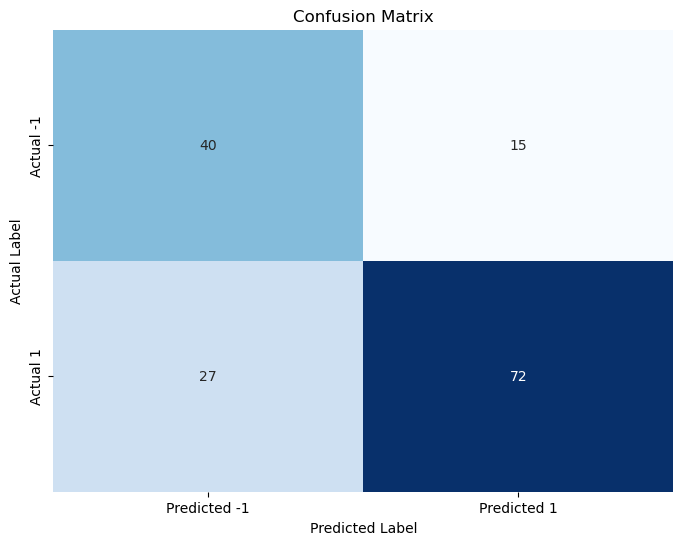

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Feature Engineering: Adding Polynomial Features
poly = PolynomialFeatures(degree=3, interaction_only=True)  # You can change degree for more complex interaction terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features (important for regularization and Perceptron)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Train Perceptron with class_weight set to 'balanced' and ElasticNet regularization (l1_ratio controls the balance between L1 and L2)
perceptron_balanced = Perceptron(class_weight='balanced', random_state=42, 
                                 alpha=0.001, eta0=0.001, max_iter=1000, tol=0.0001, 
                                 penalty='elasticnet', l1_ratio=0.5)  # l1_ratio controls balance between L1 and L2

# Fit the model
perceptron_balanced.fit(X_train_poly, y_train)

# Make predictions
y_pred_balanced = perceptron_balanced.predict(X_test_poly)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_balanced)
cm = confusion_matrix(y_test, y_pred_balanced)

# Print accuracy and classification report
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted -1', 'Predicted 1'], 
            yticklabels=['Actual -1', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# Using Data augmentation

In [14]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # For data augmentation

# Assume your data is already loaded as 'data' and is already scaled

# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Skip Standardization since the data is already scaled

# Define the parameter grid including penalty (L1, L2, ElasticNet)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Add L1, L2, ElasticNet
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'tol': [1e-4, 1e-3, 1e-2],
    'l1_ratio': [0.15, 0.5, 0.85]  # Only relevant when using 'elasticnet'
}

# Define Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Perform GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model performance
print("Best parameters:", grid_search.best_params_)
best_perceptron = grid_search.best_estimator_

# Evaluate with the test set
y_pred = best_perceptron.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.85, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}
Accuracy: 42.86%


# Using SMOTE and ENN resampling

In [15]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN  # For combined SMOTE and ENN resampling

# Assume your data is already loaded as 'data' and is already scaled

# Separate the features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation using SMOTE + ENN (to remove noisy samples after oversampling)
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Skip Standardization since the data is already scaled

# Define a more expansive parameter grid for tuning different models
param_grid_perceptron = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization techniques
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'tol': [1e-4, 1e-3, 1e-2],
    'l1_ratio': [0.15, 0.5, 0.85]  # Only relevant when using 'elasticnet'
}

# For Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# For Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear']  # Important to include solver for L1 regularization
}

# Define Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Perform GridSearchCV for Perceptron
grid_search_perceptron = GridSearchCV(Perceptron(random_state=42), param_grid_perceptron, cv=stratified_kfold, scoring='accuracy')
grid_search_perceptron.fit(X_train_resampled, y_train_resampled)

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=stratified_kfold, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Perform GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=stratified_kfold, scoring='accuracy')
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Evaluate all models with the test set
y_pred_perceptron = grid_search_perceptron.best_estimator_.predict(X_test)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_logreg = grid_search_logreg.best_estimator_.predict(X_test)

# Print results
print("Best parameters for Perceptron:", grid_search_perceptron.best_params_)
print(f'Perceptron Accuracy: {accuracy_score(y_test, y_pred_perceptron) * 100:.2f}%')

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%')

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg) * 100:.2f}%')

Best parameters for Perceptron: {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.15, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.01}
Perceptron Accuracy: 64.29%
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 73.38%
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 68.18%
